In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-04-04 14:28:33,418] INFO in core: Started 


2019-10-04


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
CSI 300,84.0,-0.059156,0.937454,-3.009172,-0.568300,0.264910,0.577142,1.403792,0.952820,-5.601929,20.174870,-1.306346
M1,84.0,-0.174160,0.831724,-3.100050,-0.317254,0.093174,0.200576,1.420286,0.935672,-14.628447,23.204726,-1.707922
S&P 500,84.0,-0.233584,1.112447,-3.782368,-0.450876,0.115942,0.267451,3.152724,0.646140,-20.123262,33.717264,-0.870176
IRA,84.0,-0.132521,2.194250,-7.145023,-0.128448,0.294039,0.561009,5.842456,0.373640,-14.140935,46.663460,-1.077780


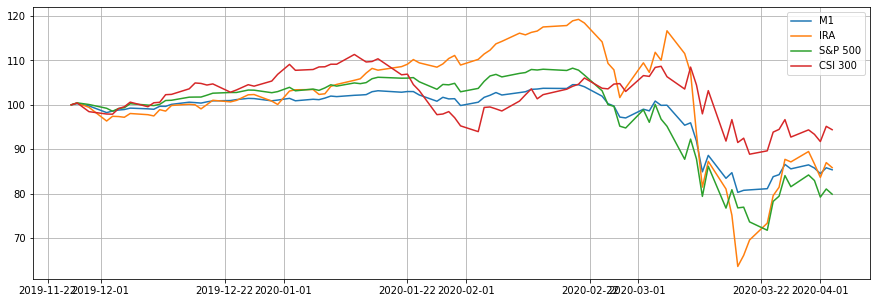

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

2020-03-06


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
CSI 300,20.0,-0.499968,4.389999,-11.006294,-3.766286,-0.071330,2.679747,5.336771,0.103055,-11.224142,18.079098,-0.548428
M1,20.0,-0.733502,3.205934,-7.520006,-2.172501,0.224999,1.167496,4.369987,0.068273,-14.553865,19.646374,-0.632789
S&P 500,20.0,-0.712633,5.773809,-10.942371,-4.594078,-1.467979,3.729302,9.060326,0.041523,-16.072939,24.608011,0.044409
IRA,20.0,-1.267497,7.176045,-15.369954,-5.077521,-0.979987,4.302468,8.449946,-0.043912,-26.412775,45.487271,-0.503124


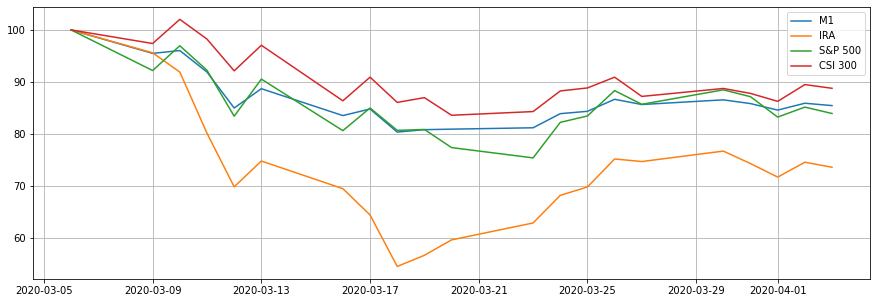

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 1)

/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.ge

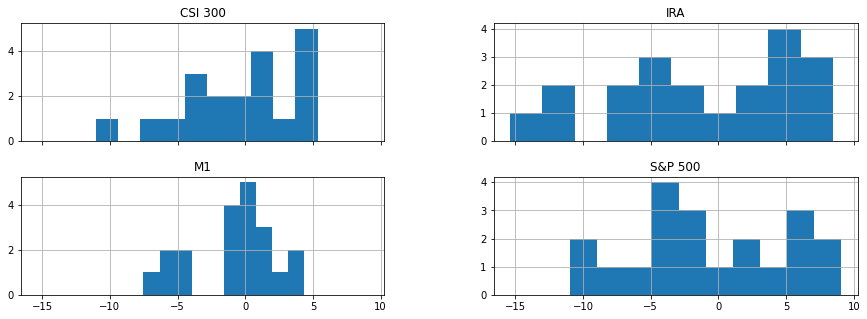

In [4]:
ret = frame.rolling(1).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(2, 2))